In [70]:
import numpy as np
import pandas as pd
import openpyxl
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## 1. movielens : 영화 평점 데이터를 활용하여 다음을 실시해보세요

1. 데이터 탐색 : NA 처리

2. 영화별 성별 평점 평균을 산출하여 성별로 상위/하위 10개 영화의 목록 추출 및 도식화 

3. 영화 평점 정보가 300건 이상 있는 영화에 대하여 여성에게 인기가 높은 상위 10개 영화

4. 남녀간 호불호가 큰 영화는?

5. 성별에 관계없이 호불호가 큰 영화는?(표준편차 활용)

In [122]:
pd.options.display.max_rows = 10 # 데이터프레임 디스플레이 설정

In [86]:
movies = pd.read_fwf('data/movielens/movies.dat', header=None)
movies

,0,1,2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN
...,...,...,...
3880,3950::Tigerland (2000)::Drama,NaN,NaN
3881,3951::Two Family House (2000)::Drama,NaN,NaN
3882,"3952::Contender, The (2000)::Drama|Thriller",NaN,NaN


In [87]:
ratings = pd.read_fwf('data/movielens/ratings.dat', header=None)
ratings

,0
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
...,...
1000206,6040::562::5::9567047
1000207,6040::1096::4::956715
1000208,6040::1097::4::956715


In [88]:
users = pd.read_fwf('data/movielens/users.dat', header=None)
users

,0
0,1::F::1::10::48067
1,2::M::56::16::70072
2,3::M::25::15::55117
...,...
6037,6038::F::56::1::14706
6038,6039::F::45::0::01060
6039,6040::M::25::6::11106


---

데이터 탐색 : NA 처리

In [89]:
movies = movies.fillna(value="")
test = movies[0]
test[movies[1]!=""] = test[movies[1]!=""] + " " + movies[movies[1]!=""][1]
test[movies[2]!=""] = test[movies[2]!=""] + " " + movies[movies[2]!=""][2]
movies = test.str.split("::")
movies = list(movies)
movies = pd.DataFrame(movies, columns = ['movie id','title','genres'])

movies

,movie id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
...,...,...,...
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [90]:
ratings = ratings[0].str.split("::")
ratings = list(ratings)
ratings = pd.DataFrame(ratings, columns=['user id', 'movie id', 'rating', 'time stamp'])
ratings

,user id,movie id,rating,time stamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
...,...,...,...,...
1000206,6040,562,5,9567047
1000207,6040,1096,4,956715
1000208,6040,1097,4,956715


In [91]:
users = users[0].str.split("::")
users = list(users)
users = pd.DataFrame(users, columns=['user id', 'gender', 'age', 'occupation', 'zip code'])
users

,user id,gender,age,occupation,zip code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
...,...,...,...,...,...
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


In [92]:
ratings = ratings.fillna(value="")
users = users.fillna(value="")

In [93]:
ratings['rating'] = ratings['rating'].astype(int)
ratings['time stamp'] = ratings['time stamp'].astype(float)
users['age'] = users['age'].astype(int)
users['occupation'] = users['occupation'].astype(int)

---

영화별 성별 평점 평균을 산출하여 성별로 상위/하위 10개 영화의 목록 추출 및 도식화 

In [94]:
df1 = ratings[['user id', 'movie id', 'rating']]
df1 = pd.merge(df1, users[['user id', 'gender']], how="left")
r_means = df1.groupby(['movie id','gender'], as_index=False).mean()
r_means = r_means.sort_values(by='rating', ascending=False)
r_means = pd.merge(r_means, movies[['movie id', 'title']], how="left")
r_means = r_means[['movie id','title','gender','rating']]
r_means

,movie id,title,gender,rating
0,787,"Gate of Heavenly Peace, The (1995)",M,5.0
1,3233,Smashing Time (1967),M,5.0
2,3012,Battling Butler (1926),F,5.0
...,...,...,...,...
7149,667,Bloodsport 2 (1995),F,1.0
7150,3899,Circus (2000),F,1.0
7151,1796,In God's Hands (1998),F,1.0


In [95]:
r_means_M = r_means[r_means['gender']=="M"]
r_means_M = r_means_M[['title','rating']] 
r_means_M.index = np.arange(1,len(r_means_M)+1,1)

r_means_F = r_means[r_means['gender']=="F"]
r_means_F = r_means_F[['title','rating']] 
r_means_F.index = np.arange(1,len(r_means_F)+1,1)

In [96]:
print("남자 인기영화 상위 10")
r_means_M.head(10)

남자 인기영화 상위 10


,title,rating
1,"Gate of Heavenly Peace, The (1995)",5.0
2,Smashing Time (1967),5.0
3,Ulysses (Ulisse) (1954),5.0
...,...,...
8,Dangerous Game (1993),5.0
9,"Bells, The (1926)",5.0
10,Angela (1995),5.0


In [97]:
print("남자 인기영화 하위 10")
r_means_M.tail(10)

남자 인기영화 하위 10


,title,rating
3662,Venice/Venice (1992),1.0
3663,Underworld (1997),1.0
3664,Theodore Rex (1995),1.0
...,...,...
3669,Mutters Courage (1995),1.0
3670,Sleepover (1995),1.0
3671,Lotto Land (1995),1.0


In [98]:
print("여자 인기영화 상위 10")
r_means_F.head(10)

여자 인기영화 상위 10


,title,rating
1,Battling Butler (1926),5.0
2,24 7: Twenty Four Seven (1997),5.0
3,Song of Freedom (1936),5.0
...,...,...
8,Dancemaker (1998),5.0
9,"Big Combo, The (1955)",5.0
10,Clean Slate (Coup de Torchon) (1981),5.0


In [99]:
print("여자 인기영화 하위 10")
r_means_F.tail(10)

여자 인기영화 하위 10


,title,rating
3472,"Crow: Salvation, The (2000)",1.0
3473,"Alan Smithee Film: Burn Hollywood Burn, An (1997)",1.0
3474,Alien Escape (1995),1.0
...,...,...
3479,Bloodsport 2 (1995),1.0
3480,Circus (2000),1.0
3481,In God's Hands (1998),1.0


---

영화 평점 정보가 300건 이상 있는 영화에 대하여 여성에게 인기가 높은 상위 10개 영화

In [100]:
r_count = df1.groupby(['movie id','gender'], as_index=False).count()
r_count.columns = ['movie id', 'gender', 'user id', 'count']
r_count

,movie id,gender,user id,count
0,1,F,591,591
1,1,M,1486,1486
2,10,F,134,134
...,...,...,...,...
7149,998,M,73,73
7150,999,F,45,45
7151,999,M,241,241


In [101]:
r_count = pd.merge(r_count, r_means, how="left")
r_count = r_count[['movie id','title','gender','rating','count']]
r_count

,movie id,title,gender,rating,count
0,1,Toy Story (1995),F,4.187817,591
1,1,Toy Story (1995),M,4.130552,1486
2,10,GoldenEye (1995),F,3.470149,134
...,...,...,...,...,...
7149,998,Set It Off (1996),M,2.890411,73
7150,999,2 Days in the Valley (1996),F,3.488889,45
7151,999,2 Days in the Valley (1996),M,3.244813,241


In [102]:
r_count300F = r_count.loc[(r_count['count'] >= 300) & (r_count['gender'] == "F")]
r_count300F = r_count300F.sort_values(by='rating', ascending=False)
r_count300F_top10 = r_count300F.head(10)
r_count300F_top10.index = np.arange(1,11,1)
r_count300F_top10[['title','rating']]

,title,rating
1,Schindler's List (1993),4.562602
2,"Shawshank Redemption, The (1994)",4.539075
3,To Kill a Mockingbird (1962),4.536667
...,...,...
8,"Wizard of Oz, The (1939)",4.355030
9,Amadeus (1984),4.346734
10,"Princess Bride, The (1987)",4.342767


---

남녀간 호불호가 큰 영화는?

성별에 관계없이 호불호가 큰 영화는?(표준편차 활용)

In [103]:
# 10건 이상의 리뷰가 있는 영화만 취급

r_count10 = r_count.loc[r_count['count'] >= 10]
r_count10

,movie id,title,gender,rating,count
0,1,Toy Story (1995),F,4.187817,591
1,1,Toy Story (1995),M,4.130552,1486
2,10,GoldenEye (1995),F,3.470149,134
...,...,...,...,...,...
7149,998,Set It Off (1996),M,2.890411,73
7150,999,2 Days in the Valley (1996),F,3.488889,45
7151,999,2 Days in the Valley (1996),M,3.244813,241


In [104]:
r_gender = r_count10.copy()
r_F = r_gender[r_gender['gender']=="F"].copy()
r_F['rating'] = -r_F['rating']
r_M = r_gender[r_gender['gender']=="M"].copy()
r_gender = pd.concat([r_M,r_F])
r_gender = r_gender[['movie id', 'title', 'gender', 'rating']].groupby(['movie id', 'title'], as_index=False).sum()
r_gender['rating'] = r_gender['rating'].abs()
r_gender.columns = ['movie id','title','diff_gender']
r_gender = r_gender.sort_values(by='diff_gender', ascending=False)
r_gender = r_gender.reset_index(drop=True)
r_gender[['title','diff_gender']].head(10)

,title,diff_gender
0,Sanjuro (1962),4.639344
1,For All Mankind (1989),4.583333
2,"Great Day in Harlem, A (1994)",4.218750
...,...,...
7,Chushingura (1962),4.111111
8,Joe the King (1999),4.090909
9,Vagabond (Sans toit ni loi) (1985),4.062500


In [105]:
r_std1 = df1[['movie id','rating']].groupby('movie id').std()
r_std1 = r_std1.sort_values(by='rating', ascending=False)
r_std1 = r_std1.dropna()
r_std1= r_std1.reset_index()
r_std1.columns = ['movie id', 'std']
r_std1 = pd.merge(r_std1,movies[['movie id','title']], how='left')

r_std1_top10 = r_std1[['title','std']].head(10)
r_std1_top10.index = np.arange(1,11,1)
r_std1_top10

,title,std
1,Foreign Student (1994),2.828427
2,Criminal Lovers (Les Amants Criminels) (1999),2.309401
3,Sunset Park (1996),2.121320
...,...,...
8,Eaten Alive (1976),2.121320
9,Talk of Angels (1998),2.121320
10,Identification of a Woman (Identificazione di ...,2.121320


---

# 2. sample_1.xlsx 파일을 불러와서 다음을 수행하세요


- 1. 국적코드, 성별, 입국객수 3개 컬럼 사용

- 2. 데이터 정보 확인하기

- 3. 데이터 기초 통계량 확인

- 4-1. 입국객수 컬럼 추출

- 4-2. 국적코드, 입국객수 2개 컬럼 추출

- 4-3. 기준년월 컬럼 생성하여 2019-11로 모든 값 입력

- 5-1. sample_1에서 성별 남성인 사람 추출

- 5-2. sample_1에서 입국객수 15만명 이상 서브세팅

- 5-3. sample_1에서 남성이면서 입국객수 10만명 이상 서브세팅

- 5-4. sample_1에서 국적코드 A01과 A18 서브세팅

- 6. sample_codemaster.xlsx 불러와서 sample_1.xlsx 파일과 병합하기

- 7. sample_2.xlsx 불러와서 기준년월 2019-12 값 넣고 위 6번 데이터프레임 아래에 병합

- 8. 최종 데이터 엑셀파일로 내보내기


In [49]:
sam1 = pd.read_excel("data/sample_1.xlsx", header=1, skipfooter=2, usecols='A:C')
sam1

,국적코드,성별,입국객수
0,A01,남성,106320
1,A01,여성,191436
2,A31,남성,319
3,A31,여성,42
4,A18,남성,158912
5,A18,여성,232943


In [50]:
sam1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적코드    6 non-null      object
 1   성별      6 non-null      object
 2   입국객수    6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [51]:
sam1.describe()

,입국객수
count,6.000000
mean,114995.333333
std,98105.752006
min,42.000000
25%,26819.250000
50%,132616.000000
75%,183305.000000
max,232943.000000


In [52]:
sam1['입국객수']

0    106320
1    191436
2       319
3        42
4    158912
5    232943
Name: 입국객수, dtype: int64

In [53]:
sam1[['국적코드','입국객수']]

,국적코드,입국객수
0,A01,106320
1,A01,191436
2,A31,319
3,A31,42
4,A18,158912
5,A18,232943


In [54]:
sam1['기준년월'] = '2019-11'
sam1

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [55]:
sam1[sam1['성별']=='남성']

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
2,A31,남성,319,2019-11
4,A18,남성,158912,2019-11


In [56]:
sam1[sam1['입국객수']>=150000]

,국적코드,성별,입국객수,기준년월
1,A01,여성,191436,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [57]:
sam1[(sam1['성별']=='남성') \
     & (sam1['입국객수']>=100000)]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
4,A18,남성,158912,2019-11


In [58]:
# sam1[(sam1['국적코드'] == 'A01') | (sam1['국적코드'] == 'A18')]
sam1[sam1['국적코드'].isin(['A01','A18'])]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [59]:
sam_cm = pd.read_excel("data/sample_codemaster.xlsx")
sam_cm

,국적코드,국적명
0,A01,일본
1,A02,대만
2,A03,홍콩
3,A18,중국
4,A19,이란
5,A22,우즈베키스탄
6,A23,카자흐스탄
7,A99,아시아 기타


In [60]:
sam1 = pd.merge(sam1, sam_cm, how='left', left_on='국적코드', right_on='국적코드')
sam1

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국


In [67]:
sam2 = pd.read_excel("data/sample_2.xlsx", header=1, skipfooter=2, usecols='A:C')
sam2['기준년월'] = '2019-12'
sam2 = pd.merge(sam2, sam_cm, how='left', left_on='국적코드', right_on='국적코드')
sam2

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,92556,2019-12,일본
1,A01,여성,163737,2019-12,일본
2,A18,남성,155540,2019-12,중국
3,A18,여성,249023,2019-12,중국


In [68]:
sam = pd.concat([sam1,sam2]) # sam = sam1.append(sam2)
sam

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국
0,A01,남성,92556,2019-12,일본
1,A01,여성,163737,2019-12,일본
2,A18,남성,155540,2019-12,중국
3,A18,여성,249023,2019-12,중국


In [72]:
sam.to_excel("output/sample_result.xlsx")

---

# 3. 기상청 xml 데이터를 파싱하여 wf 데이터를 아래와 같이 데이터프레임으로 만들어보세요

- 주의 : 기상데이터의 tag를 처리하지 않고 진행하다 보면 wf 컬럼과 같이 데이터에 []가 포함되므로 이러한 경우 문자열형의 데이터를 가지는 wf2 컬럼을 생성해주세요

In [177]:
from bs4 import BeautifulSoup
import urllib.request as req
import os.path

In [178]:
url = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=108' # 기상청 육상 중기예보
res = req.urlopen(url)

In [179]:
soup = BeautifulSoup(res,'html.parser')
soup

<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubdate>2020년 09월 09일 (수)요일 06:00</pubdate>
<item>
<author>기상청</author>
<category>육상중기예보</category>
<title>전국 육상 중기예보 - 2020년 09월 09일 (수)요일 06:00 발표</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp
<guid>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</guid>
<description>
<header>
<title>전국 육상중기예보</title>
<tm>202009090600</tm>
<wf><![CDATA[○ (강수) 12일(토)과 13일(일)에는 강원영동에 비가 오겠습니다.<br />○ (기온) 이번 예보기간의 낮 기온은 21~29도로 어제(25~30도)보다 조금 낮거나 비슷하겠습니다.<br />○ (주말전망) 12일(토)과 13일(일)은 전국이 가끔 구름많겠으나, 강원영동은 흐리고 비가 오겠고, 아침 기온은 17~20도, 낮 기온은 21~29도 분포를 보이겠습니다.<br />              동해상에는 물결이 2~4m로 높게 일겠고, 동해안은 너울에 의한 높은 물결이 해안도로나 방파제를 넘는 곳이 있겠습니다.]]></wf>
</header>
<body>
<location wl_ver="3">
<province>서울ㆍ인천ㆍ경기도</province>
<city>서울</ci

In [180]:
a = soup.find_all('location')
len(a)

41

In [181]:
result_df = pd.DataFrame({'index':[], 'wf':[]})
result_df

,index,wf


In [182]:
for idx in range(len(a)):
    temp = pd.DataFrame({'index':a[idx].find('city').string,
                         'wf':a[idx].find_all('wf')})
    result_df = pd.concat([result_df,temp])
result_df

,index,wf
0,서울,[맑음]
1,서울,[맑음]
2,서울,[맑음]
3,서울,[맑음]
4,서울,[맑음]
...,...,...
8,서귀포,[흐림]
9,서귀포,[흐림]
10,서귀포,[흐림]
11,서귀포,[흐림]


In [183]:
result_df3 = result_df
result_df3['wt2'] = [x.string for x in result_df['wf']]
result_df3

,index,wf,wt2
0,서울,[맑음],맑음
1,서울,[맑음],맑음
2,서울,[맑음],맑음
3,서울,[맑음],맑음
4,서울,[맑음],맑음
...,...,...,...
8,서귀포,[흐림],흐림
9,서귀포,[흐림],흐림
10,서귀포,[흐림],흐림
11,서귀포,[흐림],흐림


In [692]:
result_df2 = result_df.copy()

for idx in range(len(result_df)):
    result_df2['wf2'] = result_df2.iloc[idx,1].string

result_df2

,index,wf,wf2
0,서울,[구름많음],흐림
1,서울,[흐림],흐림
2,서울,[흐림],흐림
3,서울,[흐림],흐림
4,서울,[맑음],흐림
...,...,...,...
8,서귀포,[구름많음],흐림
9,서귀포,[흐림],흐림
10,서귀포,[구름많음],흐림
11,서귀포,[흐림],흐림


In [693]:
result_df2[['index','wf','wf2']].sort_values('index')

,index,wf,wf2
11,강릉,[흐림],흐림
12,강릉,[흐림],흐림
9,강릉,[흐림],흐림
8,강릉,[흐림],흐림
7,강릉,[구름많음],흐림
...,...,...,...
3,홍성,[구름많음],흐림
2,홍성,[구름많음],흐림
1,홍성,[구름많음],흐림
0,홍성,[구름많음],흐림


---

In [110]:
movies2 = pd.read_csv('data/movielens/movies.dat', sep='::', 
                      names=['movie_id', 'title', 'genres'], engine='python')
ratings2 = pd.read_csv('data/movielens/ratings.dat', sep='::', 
                      names=['user id', 'movie id', 'rating', 'time stamp'], engine='python')
users2 = pd.read_csv('data/movielens/users.dat', sep='::', 
                      names=['user id', 'gender', 'age', 'occupation', 'zip code'], engine='python')
data = pd.merge(pd.merge(ratings, users),movies)
data

,user id,movie id,rating,time stamp,gender,age,occupation,zip code,title,genres
0,1,1193,5,978300760.0,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413.0,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,97822017.0,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000206,5780,2845,1,958153.0,M,18,17,9288,White Boys (1999),Drama
1000207,5851,3607,5,957756.0,F,18,20,5541,One Little Indian (1973),Comedy|Drama|Western
1000208,5938,2909,4,957273.0,M,25,1,35401,"Five Wives, Three Secretaries and Me (1998)",Documentary


In [112]:
np.unique(data['rating'].isna())

array([False])

In [113]:
np.unique(data['user id'].isna())

array([False])

In [114]:
np.unique(data['gender'].isna())

array([False])

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   user id     1000209 non-null  object 
 1   movie id    1000209 non-null  object 
 2   rating      1000209 non-null  int32  
 3   time stamp  1000209 non-null  float64
 4   gender      1000209 non-null  object 
 5   age         1000209 non-null  int32  
 6   occupation  1000209 non-null  int32  
 7   zip code    1000209 non-null  object 
 8   title       1000209 non-null  object 
 9   genres      999606 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 72.5+ MB


In [125]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000


In [129]:
mean_ratings2 = data['rating'].groupby([data['title'],data['gender']]).mean().unstack()
mean_ratings2

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000


In [130]:
np.bincount(mean_ratings['F'].isnull() == mean_ratings['M'].isnull())

array([ 260, 3446], dtype=int64)

In [135]:
f_top10 = mean_ratings.sort_values('F', ascending=False)[:10]
f_top10

gender,F,M
title,,
Clean Slate (Coup de Torchon) (1981),5.0,3.857143
"Ballad of Narayama, The (Narayama Bushiko) (1958)",5.0,3.428571
Raw Deal (1948),5.0,3.307692
Bittersweet Motel (2000),5.0,NaN
Skipped Parts (2000),5.0,4.000000
Lamerica (1994),5.0,4.666667
"Gambler, The (A J�t�kos) (1997)",5.0,3.166667
"Brother, Can You Spare a Dime? (1975)",5.0,3.642857
Ayn Rand: A Sense of Life (1997),5.0,4.000000


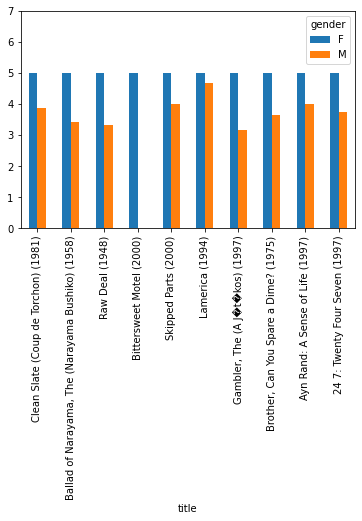

In [136]:
f_top10.plot.bar(stacked=False, ylim=(0,7))
plt.show()

In [141]:
f_bottom10 = mean_ratings[~mean_ratings['F'].isna()].sort_values('F', ascending=False).tail(10)
f_bottom10

gender,F,M
title,,
Parasite (1982),1.0,2.500000
Stalingrad (1993),1.0,3.593750
"Silence of the Palace, The (Saimt el Qusur) (1994)",1.0,NaN
"Truce, The (1996)",1.0,3.000000
Destiny Turns on the Radio (1995),1.0,2.250000
My Life and Times With Antonin Artaud (En compagnie d'Antonin Arta d) ( 993),1.0,2.777778
Sorority House Massacre II (1990),1.0,1.956522
Big Bully (1996),1.0,2.000000
Dangerous Ground (1997),1.0,3.333333


In [144]:
title300 = data.groupby('title').size()
title300 = title300.index[title300 >= 300]
title300

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '20,000 Leagues Under the Sea (1954)',
       '2001: A Space Odyssey (1968)', '2010 (1984)', '28 Days (2000)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1058)

In [145]:
mean_ratings300 = mean_ratings.loc[title300]
np.bincount(mean_ratings300['F'].isnull() == mean_ratings300['M'].isnull())

array([   0, 1058], dtype=int64)

In [154]:
f_top10_300 = mean_ratings300.sort_values(by='F', ascending=False)[:10]
f_top10_300

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
"Usual Suspects, The (1995)",4.513317,4.518248


In [173]:
mean_ratings300['diff'] = (mean_ratings300['M'] - mean_ratings300['F']).abs()
mean_ratings300 = mean_ratings300.sort_values('diff')
mean_ratings300[-10:]

gender,F,M,diff
title,,,
Rocky III (1982),2.361702,2.943503,0.581801
Grease (1978),3.975265,3.367041,0.608224
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
"Longest Day, The (1962)",3.411765,4.031447,0.619682
Dumb & Dumber (1994),2.697987,3.336595,0.638608
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351


In [176]:
std_ratings = data.groupby('title')['rating'].std()
std_ratings300 = std_ratings[title300]
std_ratings300.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                           1.321333
Blair Witch Project, The (1999)                1.316368
Natural Born Killers (1994)                    1.307198
Tank Girl (1995)                               1.277695
Rocky Horror Picture Show, The (1975)          1.260177
Eyes Wide Shut (1999)                          1.259624
Billy Madison (1995)                           1.249970
Bicentennial Man (1999)                        1.245533
Babe: Pig in the City (1998)                   1.239379
South Park: Bigger, Longer and Uncut (1999)    1.235380
Name: rating, dtype: float64